In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import *
from sklearn.model_selection import train_test_split
from sklearn.metrics import *
%matplotlib inline

In [3]:
dataset = "../data/diabetes.csv"

df = pd.read_csv(dataset)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
cat_cols = [col for col in df.columns if df[col].dtype == 'object']
num_cols = [col for col in df.columns if df[col].dtype != 'object']

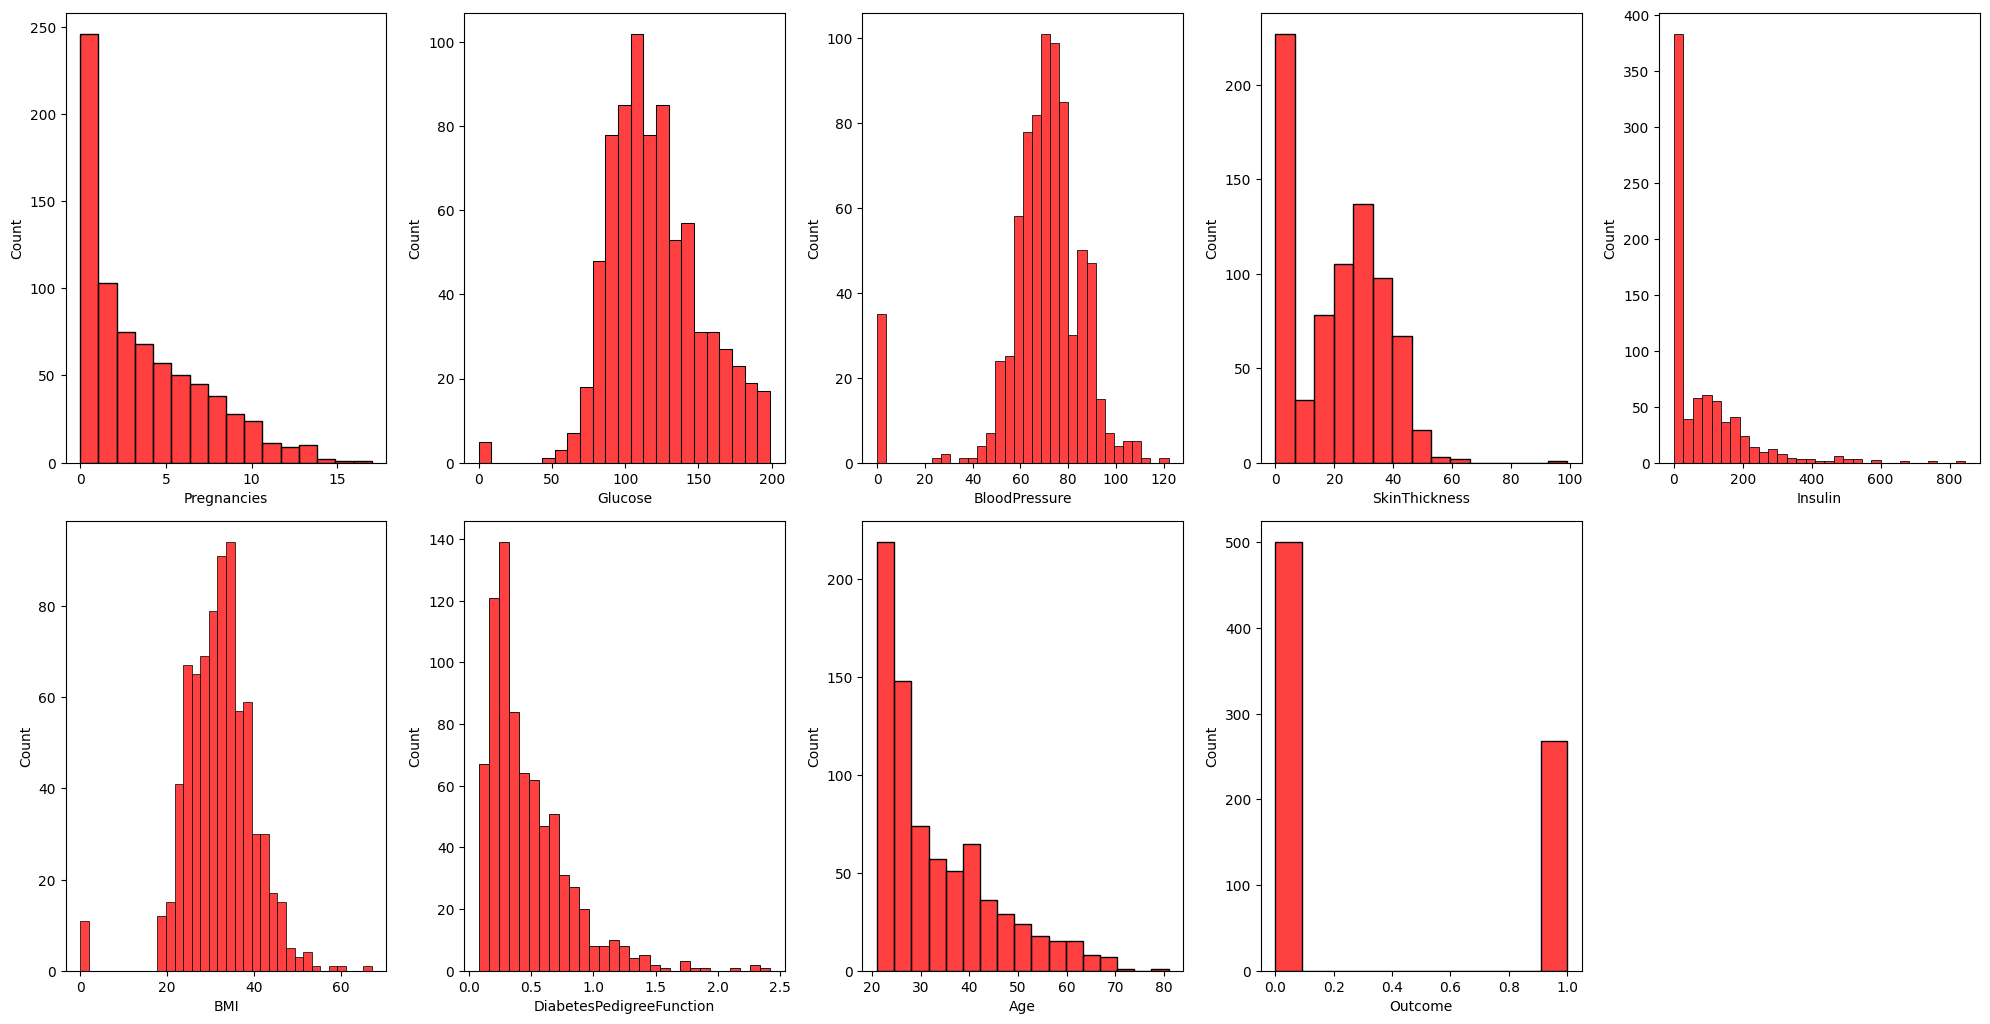

In [5]:
plt.figure(figsize = (20, 15))
plotnumber = 1
for column in num_cols:
    if plotnumber <= 9:
        ax = plt.subplot(3, 5, plotnumber)
        sns.histplot(df[column],color='red',)
        plt.xlabel(column)
    plotnumber += 1 

plt.tight_layout()
plt.show()

In [6]:
print((df == 0).sum())

zero_not_accepted = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

for column in zero_not_accepted:
    df[column] = df[column].replace(0, np.NaN)
    mean = int(df[column].mean(skipna=True))
    df[column] = df[column].replace(np.NaN, mean)

print((df == 0).sum())

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64
Pregnancies                 111
Glucose                       0
BloodPressure                 0
SkinThickness                 0
Insulin                       0
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64


In [7]:
train, test = train_test_split(df, test_size=0.4, random_state=28)
train, validation = train_test_split(df, test_size=0.1, random_state=28)

print(f"Train set has {train.shape[0]} rows and {train.shape[1]} columns")
print(f"Test set has {test.shape[0]} rows and {test.shape[1]} columns")
print(f"Validation set has {validation.shape[0]} rows and {validation.shape[1]} columns")
test.head()

Train set has 691 rows and 9 columns
Test set has 308 rows and 9 columns
Validation set has 77 rows and 9 columns


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
728,2,175.0,88.0,29.0,155.0,22.9,0.326,22,0
392,1,131.0,64.0,14.0,415.0,23.7,0.389,21,0
68,1,95.0,66.0,13.0,38.0,19.6,0.334,25,0
48,7,103.0,66.0,32.0,155.0,39.1,0.344,31,1
74,1,79.0,75.0,30.0,155.0,32.0,0.396,22,0


In [8]:
le = LabelEncoder()

for col in cat_cols:
    train[col] = le.fit_transform(train[col])
    validation[col] = le.transform(validation[col])
    test[col] = le.transform(test[col])


# split data into features and target
X_train = train.drop('Outcome', axis=1)
y_train = train['Outcome']

X_test = test.drop('Outcome', axis=1)
y_test = test['Outcome']

X_validation = validation.drop('Outcome', axis=1)
y_validation = validation['Outcome']

# scale data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_validation = scaler.transform(X_validation)

In [21]:
def run_model(model, X_train, y_train, X_test, y_test, X_validation, y_validation):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"Accuracy score\t: {accuracy_score(y_test, y_pred)} \nPrecision score\t: {precision_score(y_test, y_pred)} \nRecall score\t: {recall_score(y_test, y_pred)} \nF1 score\t: {f1_score(y_test, y_pred)}")
    print()
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, cmap='YlGnBu_r')
    plt.xlabel('Predicted')
    plt.ylabel('Truth')
    plt.show()
    # print()
    print(f"Validation score: {model.score(X_validation, y_validation)}") 

Accuracy score	: 0.9155844155844156 
Precision score	: 0.875 
Recall score	: 0.875 
F1 score	: 0.875



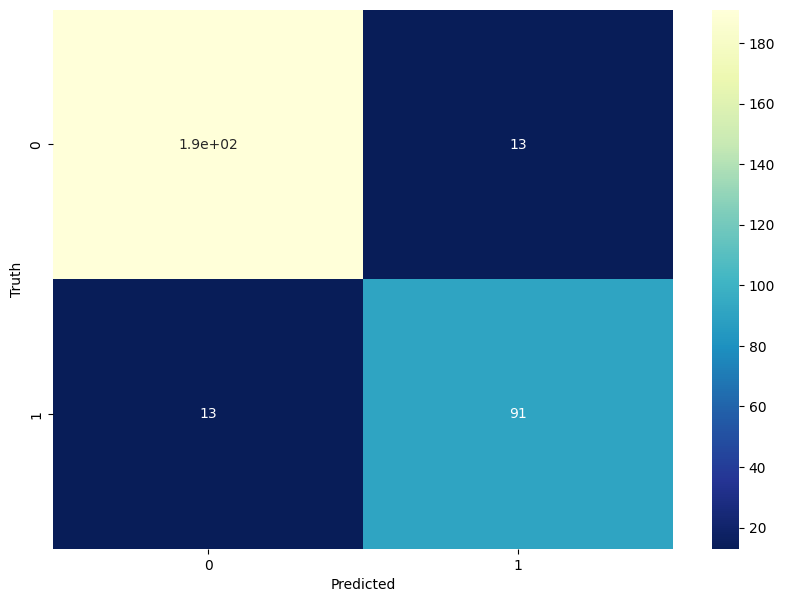

Validation score: 0.6623376623376623


In [22]:
model = DecisionTreeClassifier(random_state=25)
run_model(model, X_train, y_train, X_test, y_test, X_validation, y_validation)